In [5]:
from influxdb import InfluxDBClient
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')
from pandas import read_csv

In [6]:
folderNames = ['s1t1rc1nc1t2xlargecomputeprimeappt2nanob8j' 
              ]

host = '10.155.208.224'
port = 8086
username= 'root'
password = 'root'
appnames  = ["primeapp"]


In [7]:
def getAllNodeNames(client):
    queryResult = client.query("SHOW TAG VALUES FROM uptime WITH KEY=nodename;")
    nodeNames_temp = list(queryResult.get_points())
    dfnodeNames = pd.DataFrame(nodeNames_temp)
    allNodeNames = dfnodeNames[:]["value"]
    return allNodeNames
def getNamespaceNames(client,node):
    nsQuery = client.query("SHOW TAG VALUES FROM uptime WITH KEY=namespace_name WHERE nodename = '"+node+"';")
    nsQuery_temp = list(nsQuery.get_points())
    dfnsNames = pd.DataFrame(nsQuery_temp)
    allnsNames = dfnsNames[:]["value"]
    return allnsNames
def getAllPodNames(client,node,ns_name):
    queryResult = client.query("SHOW TAG VALUES FROM uptime WITH KEY = pod_name WHERE namespace_name = '"+ns_name+"' AND nodename = '"+node+"';")
    podNames_temp = list(queryResult.get_points())
    dfpodNames = pd.DataFrame(podNames_temp)
    if dfpodNames.empty: 
        return dfpodNames
    else:
        allpodNames = dfpodNames[:]["value"]
        return allpodNames
def getCPUUtilizationNode(client, node):
    queryResult = client.query('SELECT * FROM "cpu/node_utilization" where nodename = \''+node+'\' AND type=\'node\';')
    dfcpuUtilization = pd.DataFrame(queryResult['cpu/node_utilization'])
    return dfcpuUtilization
def getCPUUtilizationPod(client, node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "cpu/usage_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfcpuUtilization = pd.DataFrame(queryResult['cpu/usage_rate'])
    return dfcpuUtilization
def getCPUUtilizationPodContainer(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "cpu/usage_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\' AND type=\'pod_container\';')
    dfcpuUtilization = pd.DataFrame(queryResult['cpu/usage_rate'])
    return dfcpuUtilization
def prepareCpuUtilization(client,node,ns_name, pod_name):
    cpuUtilization = getCPUUtilizationNode(client,node)
    podCpuUtilization = getCPUUtilizationPod(client,node,ns_name, pod_name)
    containercpuUtilization = getCPUUtilizationPodContainer(client,node,ns_name, pod_name)
    plt.plot(cpuUtilization.index, cpuUtilization['value'] *1000, 'r', label="node") # plotting t, a separately 
    plt.plot(podCpuUtilization.index, podCpuUtilization['value'], 'b', label="pod") # plotting t, b separately 
    plt.plot(containercpuUtilization.index, containercpuUtilization['value'], 'g', label="container") # plotting t, c separately
    plt.legend(loc='upper left')
    plt.show()
def getMemoryUtilizationNode(client,node):
    queryResult = client.query('SELECT * FROM "memory/node_utilization" where nodename = \''+node+'\' AND type=\'node\';')
    dfmemUtilization = pd.DataFrame(queryResult['memory/node_utilization'])
    return dfmemUtilization
def getMemoryUtilizationPod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "memory/usage" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['memory/usage'])
    return dfmemUtilization
def getMemoryUtilizationPodContainer(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "memory/usage" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\' AND type=\'pod_container\';')
    dfmemUtilization = pd.DataFrame(queryResult['memory/usage'])
    return dfmemUtilization
def prepareMemoryUtilization(client,node,ns_name, pod_name):
    memoryUtilization = getMemoryUtilizationNode(client,node)
    podMemoryUtilization = getMemoryUtilizationPod(client,node,ns_name, pod_name)
    containerMemoryUtilization = getMemoryUtilizationPodContainer(client,node,ns_name, pod_name)
    plt.plot(memoryUtilization.index, memoryUtilization['value'], 'r', label="node") # plotting t, a separately 
    plt.plot(podMemoryUtilization.index, podMemoryUtilization['value'], 'b', label="pod") # plotting t, b separately 
    plt.plot(containerMemoryUtilization.index, containerMemoryUtilization['value'], 'g', label="container") # plotting t, c separately 
    plt.legend(loc='upper left')
    plt.show()
def getNetworkTxRatePod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx_rate'])
    return dfmemUtilization
def getNetworkTxPod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx'])
    return dfmemUtilization
def getNetworkTxErrorsPod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx_errors" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx_errors'])
    return dfmemUtilization
def getNetworkTxErrorsRatePod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx_errors_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx_errors_rate'])
    return dfmemUtilization
def prepareNetworkTxRateUtilization(client,node,ns_name, pod_name):
    podNetworTxRate = getNetworkTxRatePod(client,node,ns_name, pod_name)
    podNetworTx = getNetworkTxPod(client,node,ns_name, pod_name)
    podNetworkError = getNetworkTxErrorsPod(client,node,ns_name, pod_name)
    podNetworkErrorRate = getNetworkTxErrorsRatePod(client,node,ns_name, pod_name)
    plt.plot(podNetworTxRate.index, podNetworTxRate['value'], 'b') # plotting t, b separately 
    #plt.plot(podNetworTx.index, podNetworTx['value'], 'g') # plotting t, b separately 
    #plt.plot(podNetworkError.index, podNetworkError['value'], 'y') # plotting t, b separately 
    plt.plot(podNetworkErrorRate.index, podNetworkErrorRate['value'], 'r') # plotting t, b separately 
    plt.show()
def getNetworkRxRatePod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx_rate'])
    return dfmemUtilization
def getNetworkRxPod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx'])
    return dfmemUtilization

def getNetworkRxErrorsPod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx_errors" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx_errors'])
    return dfmemUtilization
def getNetworkRxErrorsRatePod(client,node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx_errors_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx_errors_rate'])
    return dfmemUtilization
def prepareNetworkRxRateUtilization(client,node,ns_name, pod_name):
    podNetworRxRate = getNetworkRxRatePod(client,node,ns_name, pod_name)
    podNetworRx = getNetworkRxPod(client,node,ns_name, pod_name)
    podNetworkError = getNetworkRxErrorsPod(client,node,ns_name, pod_name)
    podNetworkErrorRate = getNetworkRxErrorsRatePod(client,node,ns_name, pod_name)
    plt.plot(podNetworRxRate.index, podNetworRxRate['value'], 'b') # plotting t, b separately 
    #plt.plot(podNetworRx.index, podNetworRx['value'], 'g') # plotting t, b separately 
    #plt.plot(podNetworkError.index, podNetworkError['value'], 'y') # plotting t, b separately 
    plt.plot(podNetworkErrorRate.index, podNetworkErrorRate['value'], 'r') # plotting t, b separately 
    plt.show()
def getRelevantNodeName(client,ns_name):
    allNodeNames  = getAllNodeNames(client)
    #nsNames = getNamespaceNames(allNodeNames[0])
    for node in allNodeNames:
        allPodNamesNode = getAllPodNames(client,node,ns_name)
        if(not allPodNamesNode.empty):
            return node

def getNodeResourceUtilizationDf(client, nodeName):
    Result_node_CPU = client.query("SELECT value from \"cpu/node_utilization\" where nodename = '"+nodeName+"' AND type = 'node' ")
    Result_node_MEM = client.query("SELECT value from \"memory/node_utilization\" where nodename = '"+nodeName+"' AND type = 'node' ")

    Result_node_CPU_Cores = client.query("SELECT mean(\"value\") FROM \"cpu/node_capacity\" where nodename = '"+nodeName+
                                         "' AND type = 'node' GROUP BY time(1m)")
    Result_node_mem_node = client.query("SELECT mean(\"value\")FROM \"memory/node_capacity\" where nodename = '"+
                                        nodeName+"' AND type = 'node' GROUP BY time(1m)")
    
    cpu_points = pd.DataFrame(Result_node_CPU.get_points())
    cpu_points['time'] = pd.to_datetime(cpu_points['time'])
    cpu_points = cpu_points.set_index('time')
    cpu_points.columns = ['node_cpu_util']
    mem_points = pd.DataFrame(Result_node_MEM.get_points())
    mem_points['time'] = pd.to_datetime(mem_points['time'])
    mem_points = mem_points.set_index('time')
    mem_points.columns = ['node_mem_util']
    
    cores_points = pd.DataFrame(Result_node_CPU_Cores.get_points())
    cores_points['time'] = pd.to_datetime(cores_points['time'])
    cores_points = cores_points.set_index('time')
    cores_points.columns = ['node_cores']
    
    mem_node_points = pd.DataFrame(Result_node_mem_node.get_points())
    mem_node_points['time'] = pd.to_datetime(mem_node_points['time'])
    mem_node_points = mem_node_points.set_index('time')
    mem_node_points.columns = ['node_mem']
    
    df_node =pd.concat([cpu_points, mem_points,cores_points,mem_node_points], axis=1)
    return df_node
def getPodResourceUtilizationDf(client, node, ns_name, pod_name):
    Result_Pod_CPU_usage = client.query('SELECT value FROM "cpu/usage_rate" where nodename = \''+node+
                                        '\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+
                                        '\'  AND type=\'pod\';')
    Result_Pod_MEM_usage = client.query('SELECT value from \"memory/usage\" where nodename = \''+node+
                                        '\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+
                                        '\'  AND type=\'pod\';')
    
    Result_Pod_CPU_limit = client.query('SELECT mean(\"value\") FROM "cpu/limit" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\' group by time(1m);')
    Result_Pod_MEM_limit = client.query('SELECT mean(\"value\") from \"memory/limit\" where nodename = \''+node+
                                        '\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+
                                        '\'  AND type=\'pod\' group by time(1m);')
    
    Result_Pod_CPU_requests = client.query('SELECT mean(\"value\") FROM "cpu/request" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\' group by time(1m);')
    Result_Pod_MEM_requests = client.query('SELECT mean(\"value\") from \"memory/request\" where nodename = \''+node+
                                           '\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+
                                           '\'  AND type=\'pod\' group by time(1m);')
    
    
    cpu_points_usage = pd.DataFrame(Result_Pod_CPU_usage.get_points())
    cpu_points_usage['time'] = pd.to_datetime(cpu_points_usage['time'])
    cpu_points_usage = cpu_points_usage.set_index('time')
    cpu_points_usage.columns = ['pod_cpu_usage']
    
    
    mem_points_usage = pd.DataFrame(Result_Pod_MEM_usage.get_points())
    mem_points_usage['time'] = pd.to_datetime(mem_points_usage['time'])
    mem_points_usage = mem_points_usage.set_index('time')
    mem_points_usage.columns = ['pod_mem_usage']
    
     
    cpu_points_limits = pd.DataFrame(Result_Pod_CPU_limit.get_points())
    cpu_points_limits['time'] = pd.to_datetime(cpu_points_limits['time'])
    cpu_points_limits = cpu_points_limits.set_index('time')
    cpu_points_limits.columns = ['pod_cpu_limit']
    
    
    mem_points_limits = pd.DataFrame(Result_Pod_MEM_limit.get_points())
    mem_points_limits['time'] = pd.to_datetime(mem_points_limits['time'])
    mem_points_limits = mem_points_limits.set_index('time')
    mem_points_limits.columns = ['pod_mem_limit']
    
     
    cpu_points_request = pd.DataFrame(Result_Pod_CPU_requests.get_points())
    cpu_points_request['time'] = pd.to_datetime(cpu_points_request['time'])
    cpu_points_request = cpu_points_request.set_index('time')
    cpu_points_request.columns = ['pod_cpu_request']
    
    
    mem_points_request = pd.DataFrame(Result_Pod_MEM_requests.get_points())
    mem_points_request['time'] = pd.to_datetime(mem_points_request['time'])
    mem_points_request = mem_points_request.set_index('time')
    mem_points_request.columns = ['pod_mem_request']
       
    df_pod =pd.concat([cpu_points_usage, mem_points_usage,cpu_points_limits,mem_points_limits,cpu_points_request,mem_points_request ], axis=1)
    
    return df_pod
def getRequestsDf(clientK6):
    queryResult = clientK6.query('SELECT sum("value") FROM "vus" group by time(1m);')
    vus = pd.DataFrame(queryResult['vus'])
    vus.columns = ['vus','time']
    vus = vus.set_index('time')


    queryResultReqs = clientK6.query('SELECT sum("value") FROM "http_reqs" group by time(1m);')
    reqs = pd.DataFrame(queryResultReqs['http_reqs'])
    reqs.columns = ['requests','time']
    reqs = reqs.set_index('time')
    queryResultReqsDuration95 = clientK6.query('SELECT percentile("value", 95) FROM "http_req_duration" group by time(1m) ;')
    reqs_duration95 = pd.DataFrame(queryResultReqsDuration95['http_req_duration'])
    reqs_duration95.columns = [ 'requests_duration_percentile_95','time']
    reqs_duration95 = reqs_duration95.set_index('time')
    queryResultReqsDuration90 = clientK6.query('SELECT percentile("value", 90) FROM "http_req_duration" group by time(1m) ;')
    reqs_duration90 = pd.DataFrame(queryResultReqsDuration90['http_req_duration'])
    reqs_duration90.columns = ['requests_duration_percentile_90','time']
    reqs_duration90 = reqs_duration90.set_index('time')

    queryResultMaxDuration = clientK6.query('SELECT max("value") FROM "http_req_duration" group by time(1m);')
    reqs_duration_max = pd.DataFrame(queryResultMaxDuration['http_req_duration'])
    reqs_duration_max.columns = ['requests_duration_max','time']
    reqs_duration_max = reqs_duration_max.set_index('time')

    queryResultMinDuration = clientK6.query('SELECT min("value") FROM "http_req_duration" group by time(1m);')
    reqs_duration_min = pd.DataFrame(queryResultMinDuration['http_req_duration'])
    reqs_duration_min.columns = ['requests_duration_min','time']
    reqs_duration_min = reqs_duration_min.set_index('time')

    queryResultMeanDuration = clientK6.query('SELECT mean("value") FROM "http_req_duration" group by time(1m);')
    reqs_duration_mean = pd.DataFrame(queryResultMeanDuration['http_req_duration'])
    reqs_duration_mean.columns = ['requests_duration_mean','time']
    reqs_duration_mean = reqs_duration_mean.set_index('time')

    queryResultMedianDuration = clientK6.query('SELECT median("value") FROM "http_req_duration" group by time(1m);')
    reqs_duration_median = pd.DataFrame(queryResultMedianDuration['http_req_duration'])
    reqs_duration_median.columns = ['requests_duration_median','time']
    reqs_duration_median = reqs_duration_median.set_index('time')

    finalDF = pd.merge(vus, reqs, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF, reqs_duration95, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF, reqs_duration90, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF,reqs_duration_max, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF,reqs_duration_min, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF,reqs_duration_mean, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF,reqs_duration_median, left_index=True, right_index=True)
    finalDF.index = pd.to_datetime(finalDF.index)

    return finalDF

def getPodsNodesRequestsDf(client, clientK6):
    default_ns_name =  "default"
    relevantNodeName = getRelevantNodeName(client,default_ns_name)
    podNames = getAllPodNames(client,relevantNodeName, default_ns_name)
    df_node = getNodeResourceUtilizationDf(client,relevantNodeName)
    df_pods_node = []
    for podName in podNames: 
        if appnames[0] in podName: 
            df_pod = getPodResourceUtilizationDf(client,relevantNodeName, default_ns_name, podName)
            finalDF = pd.merge(df_node,df_pod, left_index=True, right_index=True)
            requestsDF = getRequestsDf(clientK6)
            finalDF = pd.merge(finalDF,requestsDF, left_index=True, right_index=True)
            finalDF['pod_cpu_usage'] = finalDF['pod_cpu_usage']/(finalDF['pod_cpu_limit'])
            finalDF['pod_cpu_limit'] = finalDF['pod_cpu_limit']/1000
            finalDF['pod_cpu_request'] = finalDF['pod_cpu_request']/1000

            finalDF['pod_mem_usage'] = finalDF['pod_mem_usage']/(finalDF['pod_mem_limit'])
            finalDF['pod_mem_limit'] = finalDF['pod_mem_limit']/(1073741824)
            finalDF['pod_mem_request'] = finalDF['pod_mem_request']/(1073741824)

            finalDF['node_cores'] = finalDF['node_cores']/1000
            finalDF['node_mem'] = finalDF['node_mem']/(1073741824)

            finalDF = finalDF.fillna(0)
            finalDF = finalDF[(finalDF.T != 0).any()]
            df_pods_node.append(finalDF)
    return df_pods_node
import numpy as np
def reject_outliers(data, m = 2):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [8]:
allFinalDFs = []
for folderName in folderNames:
    client = InfluxDBClient(host, port,username , password, folderName+'_k8s')
    clientK6 = InfluxDBClient(host, port, username, password, folderName+'_TestK6')
    df_pods_node = getPodsNodesRequestsDf(client, clientK6)
    print(folderName)
    finalDF = pd.DataFrame()
    for i in range(len(df_pods_node)):
        df_pods_node[i] = df_pods_node[i].reset_index(drop=True)
        finalDF['pod'+str(i+1)+'_cpu_usage'] = df_pods_node[i]['pod_cpu_usage']
        finalDF['pod'+str(i+1)+'_mem_usage'] = df_pods_node[i]['pod_mem_usage']
    finalDF['num_pods'] = int(len(df_pods_node))
    finalDF = pd.concat([finalDF, df_pods_node[0][['node_cores', 'node_mem','node_cpu_util','node_mem_util', 'pod_cpu_limit', 'pod_cpu_request','pod_mem_limit',
                                                   'pod_mem_request','vus','requests','requests_duration_percentile_95',
                                                  'requests_duration_percentile_90','requests_duration_max', 'requests_duration_min',
                                                   'requests_duration_mean', 'requests_duration_median'
                                                  ]]], axis=1)
    
    allFinalDFs.append(finalDF)

s1t1rc1nc1t2xlargecomputeprimeappt2nanob8j


In [9]:
df = pd.DataFrame()
for idx in range(len(folderNames)):
    df = df.append(allFinalDFs[idx])



In [10]:
df.head()

,pod1_cpu_usage,pod1_mem_usage,num_pods,node_cores,node_mem,node_cpu_util,node_mem_util,pod_cpu_limit,pod_cpu_request,pod_mem_limit,pod_mem_request,vus,requests,requests_duration_percentile_95,requests_duration_percentile_90,requests_duration_max,requests_duration_min,requests_duration_mean,requests_duration_median
0,0.000,0.031531,1,4.0,15.674213,0.01050,0.168209,1.0,1.0,0.488281,0.488281,57.0,58.0,23.302323,22.319275,54.132492,13.394667,16.524548,14.459277
1,0.014,0.056586,1,4.0,15.674213,0.01375,0.169097,1.0,1.0,0.488281,0.488281,214.0,213.0,22.547883,22.116823,32.794529,12.955470,15.613617,13.862592
2,0.047,0.097102,1,4.0,15.674213,0.02275,0.169351,1.0,1.0,0.488281,0.488281,329.0,330.0,22.266446,22.004008,37.504937,12.919162,15.494170,13.545800
3,0.073,0.093188,1,4.0,15.674213,0.02850,0.169602,1.0,1.0,0.488281,0.488281,458.0,449.0,22.437580,22.177143,60.801140,12.899183,16.123730,13.633664
4,0.107,0.119898,1,4.0,15.674213,0.03950,0.169305,1.0,1.0,0.488281,0.488281,650.0,630.0,22.058329,21.044137,36.410245,12.784970,14.972856,13.415864


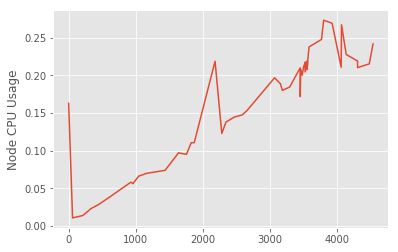

In [60]:
df = df.sort_values(['requests'])
plt.plot(df['requests'], df['node_cpu_util'])
plt.ylabel("Node CPU Usage")
plt.grid(True)
plt.show()

In [12]:
df = df.fillna(0)


In [13]:
dftemp_cpu = df[['requests','num_pods','node_cores', 'node_cpu_util','pod_cpu_limit','pod_mem_limit','node_mem_util','requests_duration_mean']]
dftemp_cpu['pod_util_cpu_avg'] = df['pod1_cpu_usage']#+df['pod2_cpu_usage']+df['pod3_cpu_usage']
dftemp_cpu['pod_util_cpu_avg'] = dftemp_cpu['pod_util_cpu_avg']/dftemp_cpu['num_pods']
dftemp_cpu['pod_util_mem_avg'] = df['pod1_mem_usage']#+df['pod2_mem_usage']+df['pod3_mem_usage']
dftemp_cpu['pod_util_mem_avg'] = dftemp_cpu['pod_util_mem_avg']/dftemp_cpu['num_pods']
#dftemp_mem = df[['requests', 'node_cores','node_mem', 'node_mem_util','pod_cpu_limit','pod_cpu_request','pod_mem_usage','pod_mem_limit','pod_mem_request', 'requests_duration_mean', 'requests_duration_percentile_95']]


C:\Users\ansjin\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ansjin\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ansjin\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [14]:
dftemp_cpu.head()

,requests,num_pods,node_cores,node_cpu_util,pod_cpu_limit,pod_mem_limit,node_mem_util,requests_duration_mean,pod_util_cpu_avg,pod_util_mem_avg
0,58.0,1,4.0,0.01050,1.0,0.488281,0.168209,16.524548,0.000,0.031531
1,213.0,1,4.0,0.01375,1.0,0.488281,0.169097,15.613617,0.014,0.056586
2,330.0,1,4.0,0.02275,1.0,0.488281,0.169351,15.494170,0.047,0.097102
3,449.0,1,4.0,0.02850,1.0,0.488281,0.169602,16.123730,0.073,0.093188
4,630.0,1,4.0,0.03950,1.0,0.488281,0.169305,14.972856,0.107,0.119898


In [40]:
final_df  = dftemp_cpu[['requests','requests_duration_mean','num_pods','pod_cpu_limit','pod_mem_limit','pod_util_cpu_avg','pod_util_mem_avg',]]
final_df['pod_util_cpu_avg'] = final_df['pod_util_cpu_avg']*final_df['pod_cpu_limit']
final_df['pod_util_mem_avg'] = final_df['pod_util_mem_avg']*final_df['pod_mem_limit']
final_df = final_df.sort_values(['requests'])


C:\Users\ansjin\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ansjin\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
final_df = final_df[(final_df[['pod_util_cpu_avg','pod_util_mem_avg','requests_duration_mean']] != 0).all(axis=1)]
final_df = final_df[np.isfinite(final_df['requests'])]
final_df = final_df[np.isfinite(final_df['requests_duration_mean'])]
final_df = final_df[np.isfinite(final_df['pod_util_cpu_avg'])]
final_df = final_df[np.isfinite(final_df['pod_util_mem_avg'])]
final_df = final_df[final_df.requests_duration_mean < 2500]
final_df = final_df.reset_index(drop=True)

In [42]:
final_df.to_csv('primeapp_test1.csv')
#dataset = read_csv('instanatest.csv', header=0, index_col=0)

In [43]:
final_df.head()

,requests,requests_duration_mean,num_pods,pod_cpu_limit,pod_mem_limit,pod_util_cpu_avg,pod_util_mem_avg
0,213.0,15.613617,1,1.0,0.488281,0.014,0.027630
1,330.0,15.494170,1,1.0,0.488281,0.047,0.047413
2,449.0,16.123730,1,1.0,0.488281,0.073,0.045502
3,630.0,14.972856,1,1.0,0.488281,0.107,0.058544
4,926.0,14.043558,1,1.0,0.488281,0.168,0.063969


In [52]:
actualValDf= final_df.sort_values(['requests'])


In [53]:
actualValDf.shape

(26, 7)

In [54]:
final_df = actualValDf[actualValDf.requests_duration_mean < 1000]

In [55]:
final_df

,requests,requests_duration_mean,num_pods,pod_cpu_limit,pod_mem_limit,pod_util_cpu_avg,pod_util_mem_avg
0,213.0,15.613617,1,1.0,0.488281,0.014,0.027630
1,330.0,15.494170,1,1.0,0.488281,0.047,0.047413
2,449.0,16.123730,1,1.0,0.488281,0.073,0.045502
3,630.0,14.972856,1,1.0,0.488281,0.107,0.058544
4,926.0,14.043558,1,1.0,0.488281,0.168,0.063969
5,956.0,14.607029,1,1.0,0.488281,0.179,0.050953
6,1042.0,14.165024,1,1.0,0.488281,0.181,0.052540
7,1161.0,14.269194,1,1.0,0.488281,0.219,0.050800
8,1435.0,13.872136,1,1.0,0.488281,0.236,0.045731
9,1635.0,13.886878,1,1.0,0.488281,0.335,0.067680


In [56]:
final_df.shape[0]

26

In [57]:
val = float(final_df.tail(1).requests)

In [58]:
val

4131.0

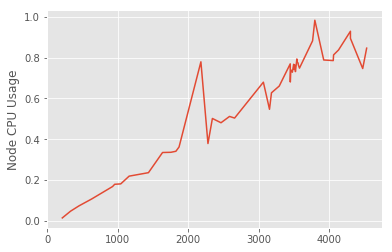

In [23]:
plt.plot( final_df['requests'], final_df['pod_util_cpu_avg'])
plt.ylabel("Node CPU Usage")
plt.grid(True)
plt.show()

In [1135]:
import seaborn as sb

# Linear Regression

In [25]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [26]:
# Use only one feature
final_df = final_df.sort_values(['pod_util_cpu_avg'])
df_X = final_df[['requests', 'requests_duration_mean', 'num_pods' ]].values
df_Y = final_df[['pod_util_cpu_avg']].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, random_state=42)

In [28]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
# Create linear regression object
#regr = linear_model.LinearRegression()
#regr = Pipeline([
#                  ('linear', linear_model.LinearRegression(fit_intercept=False))])
#regr = linear_model.Ridge (alpha = .01)
#regr = linear_model.Lasso(alpha = 0.1)
#regr = linear_model.LassoLars(alpha=.1)
regr2 = make_pipeline(PolynomialFeatures(3), Ridge())

# Train the model using the training sets
regr2.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr2.predict(X_test)

# The coefficients

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print ('Model score %.2f' %  regr2.score(X_test, y_test) )
#print ('Test score %.2f', regr.score(X_test, y_test) )
print("Train Mean squared error: %.2f"
      % mean_squared_error(y_train, regr2.predict(X_train)))


Mean squared error: 0.00
Variance score: 0.99
Model score 0.99
Train Mean squared error: 0.00


C:\Users\ansjin\Anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.0723687391103646e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


ValueError: x and y must be the same size

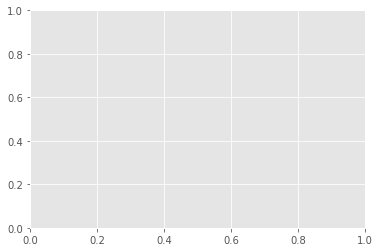

In [32]:
# Plot outputs
plt.scatter(X_train[:,0], y_train,  '-b',label="actual_CPU_utilization")
plt.plot(y_pred,'r', label="predicted_CPU_utilization")
#plt.plot(X_test[:,0], y_pred, color='blue')

plt.legend(loc='upper left')
plt.show()

In [33]:
#y_test = y_test.reset_index(drop=True)
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMs score: %.2f' % rms)

RMs score: 0.03


In [34]:
regr2.predict([[22000, 1000, 3]])

array([[-34.83993769]])

import numpy as np
dftemp_cpu = dftemp_cpu.replace([np.inf, -np.inf], np.nan)
dftemp_cpu = dftemp_cpu.fillna(0)
np.all(np.isfinite(dftemp_cpu))


In [74]:
final_df = final_df.sort_values(['requests'])
df_X = final_df[['pod_util_cpu_avg', 'requests_duration_mean' ]].values
df_Y = final_df[['requests']].values


In [75]:
df_X.shape

(94, 2)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, random_state=42)


In [77]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
# Create linear regression object
#regr = linear_model.LinearRegression()
regr = Pipeline([
                  ('linear', linear_model.LinearRegression(fit_intercept=False))])
#regr = linear_model.Ridge (alpha = .01)
#regr = linear_model.Lasso(alpha = 0.1)
#regr = linear_model.LassoLars(alpha=.1)
#regr = make_pipeline(PolynomialFeatures(2), Ridge())

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print ('Model score %.2f' %  regr.score(X_test, y_test) )
#print ('Test score %.2f', regr.score(X_test, y_test) )
print("Train Mean squared error: %.2f"
      % mean_squared_error(y_train, regr.predict(X_train)))

Mean squared error: 137821.82
Variance score: 0.90
Model score 0.90
Train Mean squared error: 89990.57


In [78]:
#y_test = y_test.reset_index(drop=True)
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMs score: %.2f' % rms)

RMs score: 371.24


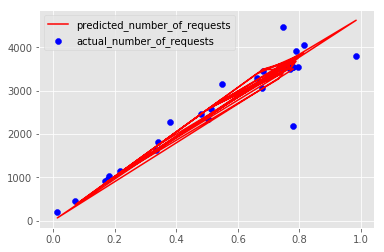

In [79]:
# Plot outputs
plt.scatter(X_test[:,0],  y_test,  color='blue',label="actual_number_of_requests")
#plt.plot(X_test[:,0], y_pred, color='blue')
plt.plot(X_test[:,0], y_pred,'-r',label="predicted_number_of_requests")
plt.legend(loc='upper left')
plt.show()

['pod_util_cpu_avg','requests_duration_mean', 'num_pods', 'pod_cpu_limit', 'pod_mem_limit']

In [90]:
regr.predict([[1,1000]])

array([[ 4867.18417892]])